## Import necessary modules

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.metrics import confusion_matrix, roc_curve, auc
# fix random seed for reproducibility
np.random.seed(123)
# magic fix for displaying plots
%matplotlib inline

Using TensorFlow backend.


In [2]:
project_dir = r'/Users/hudson/Code/marketModel/'

In [3]:
# load the dataset 
trainingData = np.load(project_dir + 'data/trainingData.npz')
X = trainingData['X']
Y = trainingData['Y']
print X.shape
print Y.shape

(9958, 360, 130)
(9958, 26)


In [4]:
batch_size = 49
num_samples = 100*batch_size
num_features = 1

X_train = X[0:num_samples, :, 0:num_features]
X_test = X[num_samples:2*num_samples, :, 0:num_features]
y_train = Y[0:num_samples, 0]
y_test = Y[num_samples:2*num_samples,0]

In [5]:
print 'Shape of X_train: ' + str(X_train.shape)
print 'Shape of y_train: ' + str(y_train.shape)
print 'Shape of X_test: ' + str(X_test.shape)
print 'Shape of y_test: ' + str(y_test.shape)

Shape of X_train: (4900, 360, 1)
Shape of y_train: (4900,)
Shape of X_test: (4900, 360, 1)
Shape of y_test: (4900,)


In [6]:
# create the model
model = Sequential()
model.add(LSTM(128, batch_input_shape = (batch_size, 360, num_features), stateful=True))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=150, batch_size=batch_size, shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (49, 128)                 66560     
_________________________________________________________________
dropout_1 (Dropout)          (49, 128)                 0         
_________________________________________________________________
dense_1 (Dense)              (49, 1)                   129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
4900/4900 [==============================] - 81s - loss: 0.5364 - acc: 0.8549      

## Model diagnostics

In [7]:
y_pred = model.predict(X_test, batch_size)

In [8]:
print confusion_matrix(y_test,y_pred>0.5)/float(num_samples)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print roc_auc

[[ 0.95081633  0.        ]
 [ 0.04918367  0.        ]]
0.567354578075


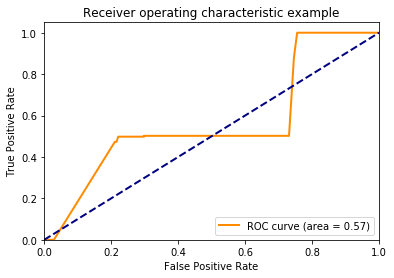

In [9]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()